<a href="https://colab.research.google.com/github/ayushjain079/Digital-Communication-System/blob/main/ADC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**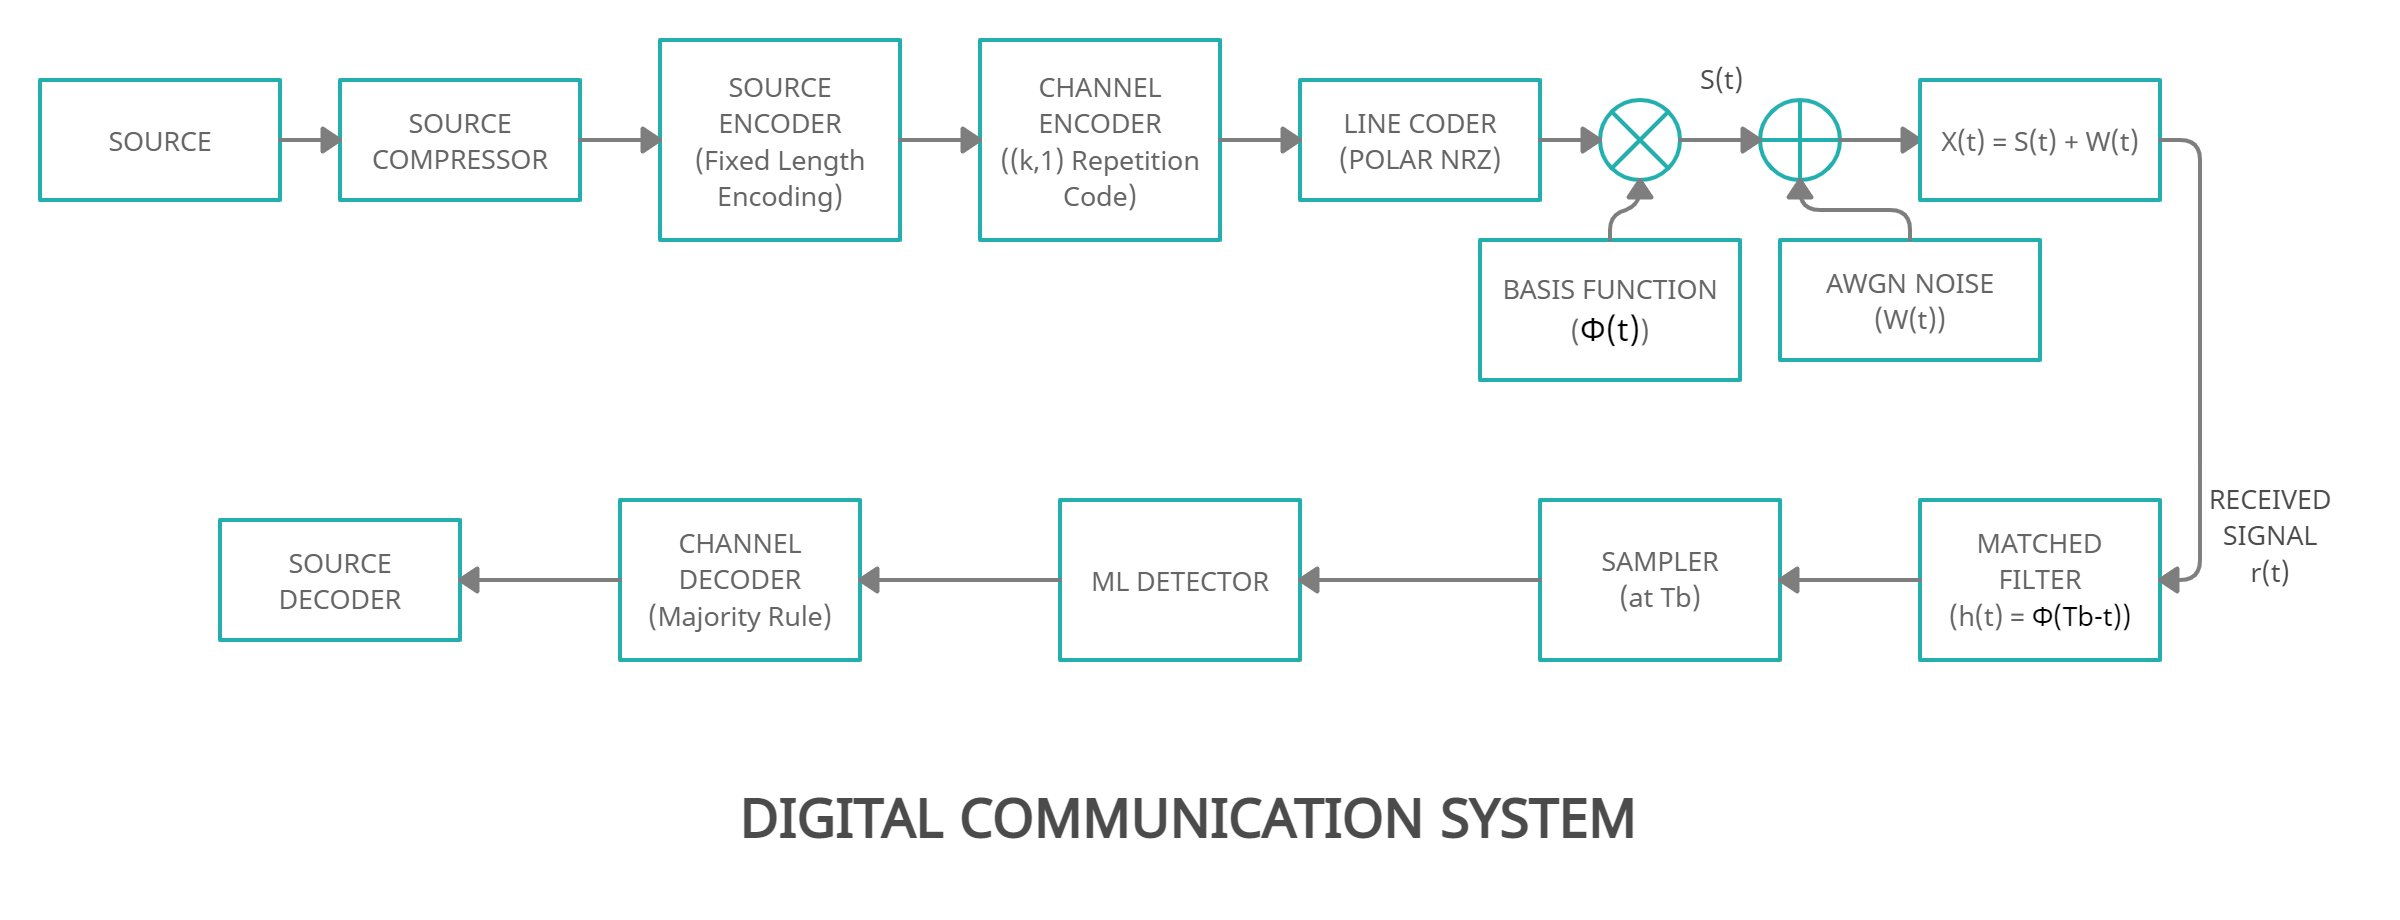**

In [24]:
import numpy as np
import math
from itertools import repeat
import matplotlib.pyplot as plt
from numpy.random import standard_normal
from scipy.special import erfc #erfc/Q function
from tabulate import tabulate

**FUNCTION FOR READING TEXT FROM THE GIVEN FILE**

In [4]:
def read_file(file_name):
  file = open(file_name,"r")                  #open the file
  #original = file.read()
  #print(len(original))
  add_string = ''                             #adding string after removing special characters
  #l = [',', '-', '(',')', '.']
  #out_list = [ x.replace(y, '')  for x in file for y in l if y in x ]
  #print(out_list)
  for x in file:
    a_string = x
    for character in a_string:                                       #removing all the special characters from each line
      if character == ',':
        a_string = a_string.replace(character, '')                        
      elif character == '-':
        a_string = a_string.replace(character, '')
      elif character == '(':
        a_string = a_string.replace(character, '')
      elif character == ')':
        a_string = a_string.replace(character, '')
      elif character == '.':
        a_string = a_string.replace(character, '')
      elif character == '\n':
        a_string = a_string.replace(character, ' ')
    add_string += a_string
  result = ''.join([i for i in add_string if not i.isdigit()])      #removing numeric values
  #result = result.replace(' ', '')                                 #removing spaces between the string
  data = result                               #read the content of file and store in variable data
  file.close()                                #close the file
  #print(data)                                #print the content of the data
  return data

data = read_file("test.txt")                  #function calling for reading the file
print(data)
compressed_length = len(data)

Wireless communications is by any measure the fastest growing segment of the communications industry As such it has captured the attention of the media and the imagination of the public Cellular systems have experienced exponential growth over the last decade and there are currently around two billion users worldwide Indeed cellular phones have become a critical business tool and part of everyday life in most developed countries and are rapidly supplanting antiquated wireline systems in many developing countries In addition wireless local area networks currently supplement or replace wired networks in many homes businesses and campuses Many new applications including wireless sensor networks automated highways and factories smart homes and appliances and remote telemedicine are emerging from research ideas to concrete systems The explosive growth of wireless systems coupled with the proliferation of laptop and palmtop computers indicate a bright future for wireless networks both as sta

**FUNCTION TO CALCULATE COMPRESSION RATIO**

In [35]:
def compression_ratio(file_name, compressed_length):
  file = open(file_name,"r")                  # open the file
  original = file.read()                      # reading and storing the data
  uncompressed_length = len(original)         # store the original data length in variable
  compression_ratio = uncompressed_length/compressed_length # calculate the compression ratio
  return compression_ratio

comp_ratio = compression_ratio("test.txt", compressed_length)
print('Compression Ratio is:', round(comp_ratio, 3))

Compression Ratio is: 1.022


**FUNCTION FOR SOURCE ENCODER**

In [6]:
def source_encoder(data):
  encoded_sequence = []
  for i in range(len(data)):            #creating dictionary for alphabets
    if data[i] == 'a':
      encoded_sequence.append([0, 0, 0, 0, 0, 0])
    elif data[i] == 'b':
      encoded_sequence.append([0, 0, 0, 0, 0, 1])
    elif data[i] == 'c':
      encoded_sequence.append([0, 0, 0, 0, 1, 0])
    elif data[i] == 'd':
      encoded_sequence.append([0, 0, 0, 0, 1, 1])
    elif data[i] == 'e':
      encoded_sequence.append([0, 0, 0, 1, 0, 0])
    elif data[i] == 'f':
      encoded_sequence.append([0, 0, 0, 1, 0, 1])
    elif data[i] == 'g':
      encoded_sequence.append([0, 0, 0, 1, 1, 0])
    elif data[i] == 'h':
      encoded_sequence.append([0, 0, 0, 1, 1, 1])
    elif data[i] == 'i':
      encoded_sequence.append([0, 0, 1, 0, 0, 0])
    elif data[i] == 'j':
      encoded_sequence.append([0, 0, 1, 0, 0, 1])
    elif data[i] == 'k':
      encoded_sequence.append([0, 0, 1, 0, 1, 0])
    elif data[i] == 'l':
      encoded_sequence.append([0, 0, 1, 0, 1, 1])
    elif data[i] == 'm':
      encoded_sequence.append([0, 0, 1, 1, 0, 0])
    elif data[i] == 'n':
      encoded_sequence.append([0, 0, 1, 1, 0, 1])
    elif data[i] == 'o':
      encoded_sequence.append([0, 0, 1, 1, 1, 0])
    elif data[i] == 'p':
      encoded_sequence.append([0, 0, 1, 1, 1, 1])
    elif data[i] == 'q':
      encoded_sequence.append([0, 1, 0, 0, 0, 0])
    elif data[i] == 'r':
      encoded_sequence.append([0, 1, 0, 0, 0, 1])
    elif data[i] == 's':
      encoded_sequence.append([0, 1, 0, 0, 1, 0])
    elif data[i] == 't':
      encoded_sequence.append([0, 1, 0, 0, 1, 1])
    elif data[i] == 'u':
      encoded_sequence.append([0, 1, 0, 1, 0, 0])
    elif data[i] == 'v':
      encoded_sequence.append([0, 1, 0, 1, 0, 1])
    elif data[i] == 'w':
      encoded_sequence.append([0, 1, 0, 1, 1, 0])
    elif data[i] == 'x':
      encoded_sequence.append([0, 1, 0, 1, 1, 1])
    elif data[i] == 'y':
      encoded_sequence.append([0, 1, 1, 0, 0, 0])
    elif data[i] == 'z':
      encoded_sequence.append([0, 1, 1, 0, 0, 1])
    elif data[i] == 'A':
      encoded_sequence.append([0, 1, 1, 0, 1, 0])
    elif data[i] == 'B':
      encoded_sequence.append([0, 1, 1, 0, 1, 1])
    elif data[i] == 'C':
      encoded_sequence.append([0, 1, 1, 1, 0, 0])
    elif data[i] == 'D':
      encoded_sequence.append([0, 1, 1, 1, 0, 1])
    elif data[i] == 'E':
      encoded_sequence.append([0, 1, 1, 1, 1, 0])
    elif data[i] == 'F':
      encoded_sequence.append([0, 1, 1, 1, 1, 1])
    elif data[i] == 'G':
      encoded_sequence.append([1, 0, 0, 0, 0, 0])
    elif data[i] == 'H':
      encoded_sequence.append([1, 0, 0, 0, 0, 1])
    elif data[i] == 'I':
      encoded_sequence.append([1, 0, 0, 0, 1, 0])
    elif data[i] == 'J':
      encoded_sequence.append([1, 0, 0, 0, 1, 1])
    elif data[i] == 'K':
      encoded_sequence.append([1, 0, 0, 1, 0, 0])
    elif data[i] == 'L':
      encoded_sequence.append([1, 0, 0, 1, 0, 1])
    elif data[i] == 'M':
      encoded_sequence.append([1, 0, 0, 1, 1, 0])
    elif data[i] == 'N':
      encoded_sequence.append([1, 0, 0, 1, 1, 1])
    elif data[i] == 'O':
      encoded_sequence.append([1, 0, 1, 0, 0, 0])
    elif data[i] == 'P':
      encoded_sequence.append([1, 0, 1, 0, 0, 1])
    elif data[i] == 'Q':
      encoded_sequence.append([1, 0, 1, 0, 1, 0])
    elif data[i] == 'R':
      encoded_sequence.append([1, 0, 1, 0, 1, 1])
    elif data[i] == 'S':
      encoded_sequence.append([1, 0, 1, 1, 0, 0])
    elif data[i] == 'T':
      encoded_sequence.append([1, 0, 1, 1, 0, 1])
    elif data[i] == 'U':
      encoded_sequence.append([1, 0, 1, 1, 1, 0])
    elif data[i] == 'V':
      encoded_sequence.append([1, 0, 1, 1, 1, 1])
    elif data[i] == 'W':
      encoded_sequence.append([1, 1, 0, 0, 0, 0])
    elif data[i] == 'X':
      encoded_sequence.append([1, 1, 0, 0, 0, 1])
    elif data[i] == 'Y':
      encoded_sequence.append([1, 1, 0, 0, 1, 0])
    elif data[i] == 'Z':
      encoded_sequence.append([1, 1, 0, 0, 1, 1])
    elif data[i] == ' ':
      encoded_sequence.append([1, 1, 0, 1, 0, 0])
  encoded_sequence = np.array(encoded_sequence)       #converting list into numpy array
  encoded_sequence = encoded_sequence.flatten()       #converting 2-D array into 1-D array
  #print(len(encoded_sequence))
  #print(encoded_sequence)
  return encoded_sequence

encoded_sequence = source_encoder(data)               #calling source encoder function and storing encoded sequence into encoded_sequence variable
print(encoded_sequence)

[1 1 0 ... 1 1 0]


**FUNCTION FOR CHANNEL ENCODER**

In [7]:
def channel_encoder(encoded_sequence, k):   #channel encoder in which we are repeating each bit 'k' times
  channel_encoded_sequence = []
  for i in range(len(encoded_sequence)):
    if encoded_sequence[i] == 0:
      channel_encoded_sequence.extend(repeat(0,k))
    else:
      channel_encoded_sequence.extend(repeat(1,k))
  channel_encoded_sequence = np.array(channel_encoded_sequence)       #converting list into numpy array
  #print(type(channel_encoded_sequence))
  #print(len(channel_encoded_sequence))
  #print(channel_encoded_sequence)
  return channel_encoded_sequence

k = 3 #'k' represents the no. of times we want to repeat the bit
channel_encoded_sequence = channel_encoder(encoded_sequence, k) #calling channel encoder function and storing channel encoded sequence into channel_encoded_sequence variable
print(channel_encoded_sequence)

[1 1 1 ... 0 0 0]


**FUNCTION FOR LINE CODING (POLAR NRZ)**

In [8]:
def line_coder(channel_encoded_sequence, Eb, samples):
  line_coded_sequence = []
  for i in range(len(channel_encoded_sequence)):
    if channel_encoded_sequence[i] == 0:
      line_coded_sequence.extend(repeat(-math.sqrt(Eb),samples))   #extending each bit as sample no. of times
    else:
      line_coded_sequence.extend(repeat(math.sqrt(Eb),samples))
  line_coded_sequence = np.array(line_coded_sequence)       #converting list into numpy array
  #print(type(line_coded_sequence))
  #print(len(line_coded_sequence))
  #print(line_coded_sequence)
  return line_coded_sequence

Eb = 0.01 # Eb represents the energy per bit
samples = 200 # no. of samples per bit
line_coded_sequence = line_coder(channel_encoded_sequence, Eb, samples) #calling function to get line coded sequence
print(line_coded_sequence)

[ 0.1  0.1  0.1 ... -0.1 -0.1 -0.1]


**FUNCTION FOR PLOTTING**

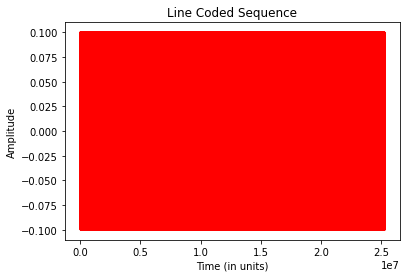

In [31]:
def plot_seq(line_coded_sequence, Tb):
  time_axis = np.linspace(0, (len(line_coded_sequence)/samples)*Tb, len(line_coded_sequence)) #setting linspace
  #print(type(time_axis))
  #print(len(time_axis))
  plt.xlabel("Time (in units)")
  plt.ylabel("Amplitude")
  plt.plot(time_axis, line_coded_sequence, color='red') #plotting the line coded sequence
  plt.show()
  return time_axis

Tb = 500   # duration per bit is 300 sec
plt.title('Line Coded Sequence')
t = plot_seq(line_coded_sequence, Tb) # function to plot the line_coded_sequence

**BPSK MODULATOR**

FUNCTION FOR BASIS FUNCTION

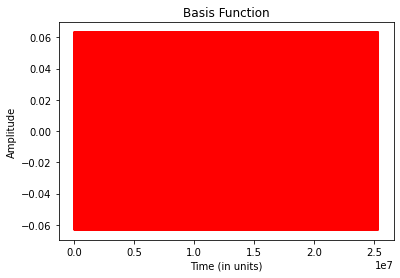

[0.06324555 0.06324554 0.0632455  ... 0.0632455  0.06324554 0.06324555]


In [32]:
def basis_function(t):
  #Time Specifications:
  Fs = samples/Tb       #samples per second
  dt = 1/Fs             #seconds per sample

  #Sine Wave:
  Fc = 400               #hertz
  b_f = math.sqrt(2/Tb)*(np.cos(2*(math.pi)*Fc*t))
  #print(type(b_f))
  #print(len(b_f))
  #print(b_f)
  return b_f

b_f = basis_function(t) #calling the basis_function and storing the values in variable
plt.title('Basis Function')
basis_plot = plot_seq(b_f, Tb) #calling plot function to plot basis function
print(b_f)

FUNCTION FOR MULTIPLIER

In [11]:
def multiplier(line_coded_sequence, b_f):
  transmitter_output = np.multiply(b_f, line_coded_sequence) #multiply basis function with line coded sequence
  #print(type(transmitter_output))
  #print(len(transmitter_output))
  #print(transmitter_output)
  return transmitter_output

transmitter_output = multiplier(line_coded_sequence, b_f)     #calling multiplier function to get transmitter output
print(transmitter_output)

[ 0.00632456  0.00632455  0.00632455 ... -0.00632455 -0.00632455
 -0.00632456]


**FUNCTION FOR AWGN CHANNEL**

In [12]:
def awgn(transmitter_output, snr_db):                     #Function for AWGN channel
  SNR_linear = 10**(snr_db/10)                            #SNR dB to linear scale
  R = []
  n = np.arange(len(channel_encoded_sequence))
  for i in n:
    P = sum((abs(transmitter_output[i*samples:(i+1)*samples]))**2)*(Tb/samples)
    N0 = P/SNR_linear                                     # Find the noise spectral density
    X = transmitter_output[i*samples:(i+1)*samples]
    n = math.sqrt(N0/2)*standard_normal(X.shape)          # computed noise signal
    r=X+n
    R.append(r)
  R = np.array(R)
  channel_output = R.ravel()
  #print(type(channel_output))
  #print(channel_output)
  #print(len(channel_output))
  return channel_output

channel_output = awgn(transmitter_output, 0)     #calling awgn function to get the channel output
print(channel_output)

[ 1.14726202e-01 -7.88349012e-02  1.31276531e-01 ...  2.17550972e-02
 -1.69494881e-01 -1.69334138e-04]


**MATCHED FILTER RECEIVER**

MATCHED FILTER AND SAMPLER

In [13]:
def matched_filter(channel_output):
  n = np.arange(0, len(channel_encoded_sequence), 1)
  #print(n)
  m_f_output = []
  for i in n:
    x = np.convolve(channel_output[i*samples:(i+1)*samples], b_f[i*samples:(i+1)*samples]) #performs convolution between channel_output and basis_function for each bit
    m_f_output.append(x[samples])                   #samples the signal at every Tb=1sec
  m_f_sampler_output = np.array(m_f_output)
  #print(type(m_f_sampler_output))
  #print(len(m_f_sampler_output))
  #print(m_f_sampler_output)
  return m_f_sampler_output

m_f_sampler_output = matched_filter(channel_output) #calling matched_filter function to get m_f_sampler_output
print(m_f_sampler_output)

[ 0.32055971  0.04849093  0.01816773 ... -0.13419604 -0.07871481
 -0.00424731]


**ML DETECTOR**

In [14]:
def ml_detector(m_f_sampler_output):
  ml_detector_output = []                           #initialize a 1-D list
  for i in range(len(m_f_sampler_output)):
    if (m_f_sampler_output[i] < 0):                 #check if the m_f_sampler_output less than 0 then append 0
      ml_detector_output.append(0)
    else:
      ml_detector_output.append(1)                  #check if the m_f_sampler_output greater than 0 then append 1
  ml_detector_output = np.array(ml_detector_output)
  #print(type(ml_detector_output))
  #print(len(ml_detector_output))
  #print(ml_detector_output)
  return ml_detector_output

ml_detector_output = ml_detector(m_f_sampler_output) #calling ml_detector function to get ml_detector output
print(ml_detector_output)

[1 1 1 ... 0 0 0]


**CHANNEL DECODER**

In [15]:
def channel_decoder(ml_detector_output):
  channel_decoded_output = []                     #initialize an 1-D list to store channel_decoded_output
  n = np.arange(0, len(ml_detector_output), 1)
  for i in n:
    if i == len(ml_detector_output)/3:
      break
    x = np.bincount(ml_detector_output[i*k:(i+1)*k]).argmax()  #checks which is maximum 0 or 0 between 3 bits
    channel_decoded_output.append(x)                           #appends whichever is maximum
  channel_decoded_output = np.array(channel_decoded_output)    #convert list into numpy array
  #print(type(channel_decoded_output))
  #print(len(channel_decoded_output))
  #print(channel_decoded_output)
  return channel_decoded_output

channel_decoded_output = channel_decoder(ml_detector_output)   #calling channel_decoder function to store channel_decoded_output
print(channel_decoded_output)

[1 1 1 ... 1 1 0]


**SOURCE DECODER**

In [16]:
def source_decoder(channel_decoded_output):
  n = np.arange(0, len(channel_decoded_output)/6, 1)
  n = n.astype(int)
  #print(n)
  decoded_output = np.char.array([''])                      #initialize numpy char array to store decoded_output
  for i in n:                                               #dictionary for decoding the channel_decoded_output
    x = channel_decoded_output[i*6:(i+1)*6]                 #stores 6 bits in variable 'x'
    if np.array_equal(x, [0, 0, 0, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['a'])
    elif np.array_equal(x, [0, 0, 0, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['b'])
    elif np.array_equal(x, [0, 0, 0, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['c'])
    elif np.array_equal(x, [0, 0, 0, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['d'])
    elif np.array_equal(x, [0, 0, 0, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array(['e'])
    elif np.array_equal(x, [0, 0, 0, 1, 0, 1]):
      decoded_output = decoded_output + np.char.array(['f'])
    elif np.array_equal(x, [0, 0, 0, 1, 1, 0]):
      decoded_output = decoded_output + np.char.array(['g'])
    elif np.array_equal(x, [0, 0, 0, 1, 1, 1]):
      decoded_output = decoded_output + np.char.array(['h'])
    elif np.array_equal(x, [0, 0, 1, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['i'])
    elif np.array_equal(x, [0, 0, 1, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['j'])
    elif np.array_equal(x, [0, 0, 1, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['k'])
    elif np.array_equal(x, [0, 0, 1, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['l'])
    elif np.array_equal(x, [0, 0, 1, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array(['m'])
    elif np.array_equal(x, [0, 0, 1, 1, 0, 1]):
      decoded_output = decoded_output + np.char.array(['n'])
    elif np.array_equal(x, [0, 0, 1, 1, 1, 0]):
      decoded_output = decoded_output + np.char.array(['o'])
    elif np.array_equal(x, [0, 0, 1, 1, 1, 1]):
      decoded_output = decoded_output + np.char.array(['p'])
    elif np.array_equal(x, [0, 1, 0, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['q'])
    elif np.array_equal(x, [0, 1, 0, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['r'])
    elif np.array_equal(x, [0, 1, 0, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['s'])
    elif np.array_equal(x, [0, 1, 0, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['t'])
    elif np.array_equal(x, [0, 1, 0, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array(['u'])
    elif np.array_equal(x, [0, 1, 0, 1, 0, 1]):
      decoded_output = decoded_output + np.char.array(['v'])
    elif np.array_equal(x, [0, 1, 0, 1, 1, 0]):
      decoded_output = decoded_output + np.char.array(['w'])
    elif np.array_equal(x, [0, 1, 0, 1, 1, 1]):
      decoded_output = decoded_output + np.char.array(['x'])
    elif np.array_equal(x, [0, 1, 1, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['y'])
    elif np.array_equal(x, [0, 1, 1, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['z'])
    elif np.array_equal(x, [0, 1, 1, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['A'])
    elif np.array_equal(x, [0, 1, 1, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['B'])
    elif np.array_equal(x, [0, 1, 1, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array(['C'])
    elif np.array_equal(x, [0, 1, 1, 1, 0, 1]):
      decoded_output = decoded_output + np.char.array(['D'])
    elif np.array_equal(x, [0, 1, 1, 1, 1, 0]):
      decoded_output = decoded_output + np.char.array(['E'])
    elif np.array_equal(x, [0, 1, 1, 1, 1, 1]):
      decoded_output = decoded_output + np.char.array(['F'])
    elif np.array_equal(x, [1, 0, 0, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['G'])
    elif np.array_equal(x, [1, 0, 0, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['H'])
    elif np.array_equal(x, [1, 0, 0, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['I'])
    elif np.array_equal(x, [1, 0, 0, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['J'])
    elif np.array_equal(x, [1, 0, 0, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array(['K'])
    elif np.array_equal(x, [1, 0, 0, 1, 0, 1]):
      decoded_output = decoded_output + np.char.array(['L'])
    elif np.array_equal(x, [1, 0, 0, 1, 1, 0]):
      decoded_output = decoded_output + np.char.array(['M'])
    elif np.array_equal(x, [1, 0, 0, 1, 1, 1]):
      decoded_output = decoded_output + np.char.array(['N'])
    elif np.array_equal(x, [1, 0, 1, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['O'])
    elif np.array_equal(x, [1, 0, 1, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['P'])
    elif np.array_equal(x, [1, 0, 1, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['Q'])
    elif np.array_equal(x, [1, 0, 1, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['R'])
    elif np.array_equal(x, [1, 0, 1, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array(['S'])
    elif np.array_equal(x, [1, 0, 1, 1, 0, 1]):
      decoded_output = decoded_output + np.char.array(['T'])
    elif np.array_equal(x, [1, 0, 1, 1, 1, 0]):
      decoded_output = decoded_output + np.char.array(['U'])
    elif np.array_equal(x, [1, 0, 1, 1, 1, 1]):
      decoded_output = decoded_output + np.char.array(['V'])
    elif np.array_equal(x, [1, 1, 0, 0, 0, 0]):
      decoded_output = decoded_output + np.char.array(['W'])
    elif np.array_equal(x, [1, 1, 0, 0, 0, 1]):
      decoded_output = decoded_output + np.char.array(['X'])
    elif np.array_equal(x, [1, 1, 0, 0, 1, 0]):
      decoded_output = decoded_output + np.char.array(['Y'])
    elif np.array_equal(x, [1, 1, 0, 0, 1, 1]):
      decoded_output = decoded_output + np.char.array(['Z'])
    elif np.array_equal(x, [1, 1, 0, 1, 0, 0]):
      decoded_output = decoded_output + np.char.array([' '])
    else:
      decoded_output = decoded_output + np.char.array(['*']) # if any character not present in the string then print '*' in place of it
  #decoded_output = decoded_output.tostring()
  decoded_output = [''.join(row) for row in decoded_output] # converts numpy char array to list
  decoded_output = ' '.join([str(elem) for elem in decoded_output]) # converts list to string
  #print(type(decoded_output))
  #print(len(decoded_output))
  #print(decoded_output)
  return decoded_output

decoded_output = source_decoder(channel_decoded_output)      #calling the source_decoder function to store decoded output
print(decoded_output)

*irvkgss komCvniIetimns*is*by*qfy mgasvze*Whe*LaErcsACwzUwimg wegiunt*oLWtpC comnuniccqeonA*indessqiKit susd jt wqY ccptuxmJ she qttKmZioh Ef*toe*nedaaKafd jxe mCagiDaBOEnumb WhM l dQic Ce*pelar*YywtuCs psvC exFerGmfcfd aspQponBiHB*crEtth*over XNeYlekt*lgsste*enI tgkrf ireuswvteDrBy*cZoafd Zxp fidlmonuuseqs wpvlbwkbeWIplfet gellular Vwnneq JevC jeepme*cZIqiBicaR buqines**toom qneSpcrr ofeoverydiz Rmze*iz*iRdt*buDmjopecuc unBriaY*bDc*aba Xcpidjz*tup*lairyng antjGuctac wmrelife*sysBens in uemyWtevedopajgukountvieAWIpuadditOoV*wireR*ss*lacaBKbqga nmBsprks kurremYROWcupplamnhZ Ev*vSelecfugyDud*netwoqkA inMmmn*Lhlieq bukjnesses bzh kampucet*SaD*fjew*apVROcitaojZKifcRsdzhc wyralgqY YensoqKTetwVrks IqsUUbtah hicpIGys andLfqctmrOeq Amatt homns aTt alpDkancgs ejd XKCkte tmBemKJidjfe aae gmKrgifg fvom zesKqbcL yxfds rgwconcsete wDstemsW*dj uHppEAjvaWgrEwth of gireteAs systiCs kl*pBel wmtdWthK vxozifKratipnuof*RapsoFwapR*nalmtop cgnpKwarc*knticitfuo bbigFtXLuru*g*eor wiXelgds nmJxoXks aothKiW sda

**FUNCTION TO CALCULATE SYMBOL ERROR PROBABILITY**

In [17]:
def symbol_error_prob(str1, str2, file_name):
  file = open(file_name,"r")                  # open the file
  original = file.read()                      # reading and storing the data
  count = 0
  for i in range(len(str1)):
    if str1[i] != str2[i]:
      count = count+1
  no_of_error_bits = count
  symbol_error_probability = no_of_error_bits/len(original)
  #print(symbol_error_probability)
  return symbol_error_probability

symbol_error_probability = symbol_error_prob(data, decoded_output, "test.txt")
print(symbol_error_probability)

0.48574408901251737


**FUNCTION FOR PLOTTING SER VS SNR (in dB)**

In [18]:
def plot_ser(snr_db, SER):
  fig, ax = plt.subplots(nrows=1,ncols = 1)
  ax.semilogy(snr_db, SER, color='m', marker='', linestyle='-', label='BPSK')
  ax.legend()
  ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('SER ($P_e$)')
  ax.set_title('Probability of Symbol Error for BPSK over AWGN channel')       #Plotting symbol error rate vs SNR (in dB)

**CALLING FUNCTIONS**

Wireless communications is by any measure the fastest growing segment of the communications industry As such it has captured the attention of the media and the imagination of the public Cellular systems have experienced exponential growth over the last decade and there are currently around two billion users worldwide Indeed cellular phones have become a critical business tool and part of everyday life in most developed countries and are rapidly supplanting antiquated wireline systems in many developing countries In addition wireless local area networks currently supplement or replace wired networks in many homes businesses and campuses Many new applications including wireless sensor networks automated highways and factories smart homes and appliances and remote telemedicine are emerging from research ideas to concrete systems The explosive growth of wireless systems coupled with the proliferation of laptop and palmtop computers indicate a bright future for wireless networks both as sta

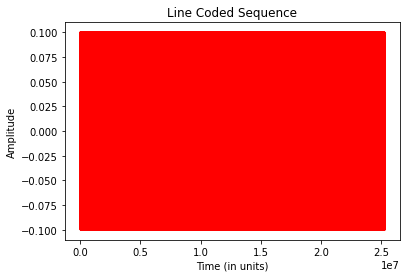

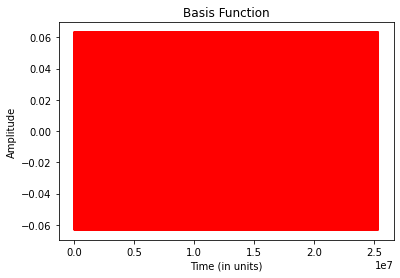

In [37]:
data = read_file("test.txt")                  #function calling for reading the file
print(data)
compressed_length = len(data)

comp_ratio = compression_ratio("test.txt", compressed_length)
print('Compression Ratio is:', round(comp_ratio, 3))

encoded_sequence = source_encoder(data)       #calling source encoder function and storing encoded sequence into encoded_sequence variable

k = 3 #'k' represents the no. of times we want to repeat the bit
channel_encoded_sequence = channel_encoder(encoded_sequence, k) #calling channel encoder function and storing channel encoded sequence into channel_encoded_sequence variable

Eb = 0.01 # Eb represents the energy per bit
samples = 200 # no. of samples per bit
line_coded_sequence = line_coder(channel_encoded_sequence, Eb, samples) #calling function to get line coded sequence

Tb = 500   # duration per bit is 300 sec
plt.title('Line Coded Sequence')
t = plot_seq(line_coded_sequence, Tb) # function to plot the line_coded_sequence

b_f = basis_function(t) #calling the basis_function and storing the values in variable
plt.title('Basis Function')
basis_plot = plot_seq(b_f, Tb) #calling plot function to plot basis function

transmitter_output = multiplier(line_coded_sequence, b_f)     #calling multiplier function to get transmitter output



In [19]:
snr_db_range = np.arange(-5, 18, 0.1)
SER = []
for snr_db in snr_db_range:
  channel_output = awgn(transmitter_output, snr_db)     #calling awgn function to get the channel output
  m_f_sampler_output = matched_filter(channel_output)   #calling matched filter function to get matched filter sampler output
  ml_detector_output = ml_detector(m_f_sampler_output)  #calling ml detector function to get ml detector output
  channel_decoded_output = channel_decoder(ml_detector_output) #calling channel decoder function to get channel decoded output
  decoded_output = source_decoder(channel_decoded_output) #calling source decoder function to get decoded output
  symbol_error_probability = symbol_error_prob(data, decoded_output, "test.txt") #calculate symbol error probability for each snr value
  SER.append(symbol_error_probability)
print(data)
print(decoded_output)

Wireless communications is by any measure the fastest growing segment of the communications industry As such it has captured the attention of the media and the imagination of the public Cellular systems have experienced exponential growth over the last decade and there are currently around two billion users worldwide Indeed cellular phones have become a critical business tool and part of everyday life in most developed countries and are rapidly supplanting antiquated wireline systems in many developing countries In addition wireless local area networks currently supplement or replace wired networks in many homes businesses and campuses Many new applications including wireless sensor networks automated highways and factories smart homes and appliances and remote telemedicine are emerging from research ideas to concrete systems The explosive growth of wireless systems coupled with the proliferation of laptop and palmtop computers indicate a bright future for wireless networks both as sta

**PLOTTING SNR(in dB) VS SER**

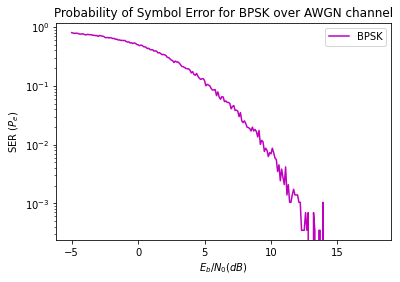

In [20]:
plot_ser(snr_db_range, SER)

**TABULATING SYMBOL ERROR RATE FOR FEW SNR VALUES**

In [27]:
snr_db_range = np.arange(-5, 16, 5)
SER = []
for snr_db in snr_db_range:
  channel_output = awgn(transmitter_output, snr_db)     #calling awgn function to get the channel output
  m_f_sampler_output = matched_filter(channel_output)   #calling matched filter function to get matched filter sampler output
  ml_detector_output = ml_detector(m_f_sampler_output)  #calling ml detector function to get ml detector output
  channel_decoded_output = channel_decoder(ml_detector_output)  #calling channel decoder function to get channel decoded output
  decoded_output = source_decoder(channel_decoded_output) #calling source decoder function to get decoded output
  symbol_error_probability = round(symbol_error_prob(data, decoded_output, "test.txt"), 4) #calculate symbol error probability for each snr value
  SER.append(symbol_error_probability)

table = [['SNR (in dB)', 'SER'], [snr_db_range[0], SER[0]], [snr_db_range[1], SER[1]], [snr_db_range[2], SER[2]], [snr_db_range[3], SER[3]], [snr_db_range[4], SER[4]]]
print(tabulate(table, headers='firstrow')) # tabulate symbol error rate for -5dB, 0dB, 5dB, 10dB, 15dB SNR values

  SNR (in dB)     SER
-------------  ------
           -5  0.7768
            0  0.5021
            5  0.1227
           10  0.0076
           15  0
